# CS5228 Assignment 1a - Clustering (50 Points)

Hello everyone, this assignment notebook covers the topic of clustering. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e. your lines of code) between sentences that "your code starts here" and "your code end here". The space between these two lines does not reflect reflect the required or expected lines of code :). For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed) 

**Important:** 
* Remember to save this Jupyter notebook as A1a_YourNameInLumiNUS_YourNUSNETID.ipynb
* Please upload only this notebook directly to LumiNUS (no other files, not as zipped archive)
* Submission deadline is September 19th, 11.59 pm (together with A1b)

Please also add your nusnet and student id also in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0236597M'
nusnet_id = 'e0744016'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts are provide additional explanations, documentation, or some discussion. The code and markdown cells you are a supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1. K-Means (20 Points)**
    * 1.1 Performing K-Means "By Hand" (4 Points)
        * 1.1a) (2 Points)
        * 1.1b) (2 Points)
    * 1.2 Initializing Centroids (10 Points)
        * 1.2a) (6 Points)
        * 1.2b) (2 Points)
        * 1.2c) (2 Points)
    * 1.3 Questions about K-Means (6 Points)
        * 1.3a) (3 Points)
        * 1.3b) (3 Points)
* **2. DBSCAN (20 Points)**
    * 2.1 Implementing DBSCAN for Noise Detection (14 Points)
    * 2.2 Questions about DBSCAN (6 Points)
        * 2.2a) (2 Points)
        * 2.2b) (2 Points)
        * 2.2c) (2 Points)
* **3. AGNES (10 Points)**
    * 3.1 Interpreting Dendrograms (6 Points)
    * 3.2 Questions about AGNES (4 Points)
        * 3.2a) (2 Points)
        * 3.2b) (2 Points)

## Setting up the Notebook

In [2]:
%matplotlib inline

The following statements contain all the packages need to complete the notebook.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.metrics.pairwise import euclidean_distances

from src.utils import plot_centroid_distributions

## 1. K-Means (20 Points)

### 1.1 Performing K-Means "By Hand" (4 Points)

The plot below shows a toy dataset of 15 data points labeled A, B, C, ..., O.

<img src="data/a1-kmeans-data.png">

**1.1a) Perform K-Means with K=3 on the data, Taking points C, H, and M as the initial cluster centers! (2 Points)** At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.

**Your Answer:**

class 1: center_point = C, position = (0, 1), cluster_points = [A, B, C, D, E]  
class 2: center_point = H, position = (0, 0), cluster_points = [F, G, H, I, J]  
class 3: center_point = M, position = (0, -1), cluster_points = [K, L, M, N, O]

 **1.1b) Do you think this clustering result is satisfactory? (2 Points)** Briefly discuss your answer!
 
 **Your Answer:**

I think the result is not reasonable due to the choice of initial cluster centers. The initail cluster centers are close to each other and they are all in the center of all points. It would be much better if the initial cluster centers are seperated.

### 1.2 Initializing Centroids (10 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Mean++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next based on probabilities depending on the distances between the data points and the existing clusters. You will implement the K-Means++ initialization in this task.

Consider another heuristic **MaxDist** which is very similar to K-Means++, which picks the next centroid as the data point which is farthest away from its currently nearest existing centroid. -- In fact, some you you in the lecture have asked why we not simply do this instead of picking points with some randomness -- More formally, given a pick for the first centroid $c_1$, all following centroids $c_k$ for $k=2,...,K$ are defined as:

$$
c_k = \underset{x\in X}{\mathrm{argmax}} \left( \underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2 \right)
$$

where $X$ is the set of all data points. Appreciate that $\underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2$ is also part of K-Means++, only instead of picking with some randomization we always pick the point with the largest distance.

For testing your implementation in the following, we use the dataset that generated the figure above in 1.1. The data points are in the order that $A=X[0]$, $B=X[1]$, $C=X[2]$, ..., $N=X[13]$, $O=X[14]$. This will make the interpretation of the results easier.

In [4]:
X = np.array([[-4,1], [-2,1], [0,1], [2,1], [4,1],
              [-4,0], [-2,0], [0,0], [2,0], [4,0], 
              [-4,-1], [-2,-1],  [0,-1], [2,-1], [4,-1]])

**1.2a) Implement method `initialize_centroids` below to calculate the initial centroids based on the two methods "K-Means++" and "MaxDist"! (6 Points)** Since both methods are quite similar, this can easily be done in the same method. Note that `initialize_centroids` allows to specify the first centroid manually. This is very useful for testing and interpreting the results later.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results is correct, there will be some minor deduction of points. Note that we already imported the method `euclidean_distances` for you, and you can use anything provided by `numpy`.

In [16]:
def initialize_centroids(X, k, c1=None, method='kmeans++'):
    
    """
    Calculate the initial centroids for performin K-Means

    Inputs:
    - X: A numpy array of shape (N, F) containing N data samples with F features
    - k: number of centroids/clusters
    - c1: First centroid as the index of the data point in X
    - method: string that specifies the methods to calculate centroids ('kmeans++' or 'maxdist')

    Returns:
    - centroid_indices: NumPy array containing k centroids, reprsented by the
      indices of the respective data points in X
    """   
    
    centroid_indices = []
    
    # If the index of the first centroid index c1 is not specified, pick it randomly
    if c1 is None:
        c1 = np.random.randint(0, X.shape[0])
        
    # Add selected centroid index to list
    centroid_indices.append(c1)        
    
    # Calculate and add c2, c3, ..., ck 
    while len(centroid_indices) < k:
        
        c = None
        
        #########################################################################################
        ### Your code starts here ###############################################################
        
        ## Remeber to cover the 2 cases 'kmeans++' and 'maxdist'
        if method == 'kmeans++':
            c = np.argmax(euclidean_distances(X,X[centroid_indices]).min(axis=1),axis=0)
        elif method == 'maxdist':
            c = np.argmax(euclidean_distances(X,X[centroid_indices]).max(axis=1),axis=0)
        ### Your code ends here #################################################################
        #########################################################################################                
            
        centroid_indices.append(c)
    
    # Return list of k centroid indices as numpy array (e.g. [0, 1, 2] for K=3)
    return np.array(centroid_indices)

initialize_centroids(X, 3, method='maxdist')

array([ 1, 14,  0])

**Interpreting the results and interpreting your implementation.** We provide you with a method `plot_centroid_distributions` (check `src/utils.py` for the details on the input parameters) to visualize the process of picking all centroids, given a manually chosen first centroid.

`plot_centroid_distributions` executes your implementation of `initialize_centroids` multiple times specified by the input parameter `num_runs`. During this process, the methods counts the number of time each data point (i.e., it's index $0..14$) was picked for $c_2$, ..., $c_k$ (we use K=3 throughout this section). This gives you a distribution of how often a data point was selected as centroid, and plots it as a bar chart. Of course, since we specify the first centroid $c_1$ as in input parameter, the distribution for $c_1$ is always a single bar with a height of `num_runs`.

**1.2b) Run `plot_centroid_distributions` using the method MaxDist using the code below! (2 Points)** The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the the value of `num_runs`. Explain the results, discuss whether they meet your expectations of the method **MaxDist**, and discuss if the result is unique! Use the markdown cell below the plots.

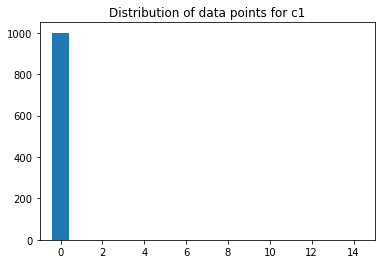

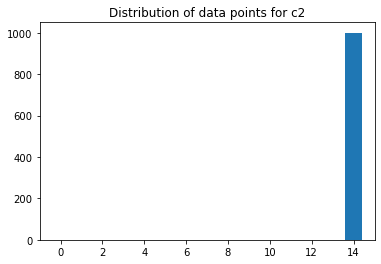

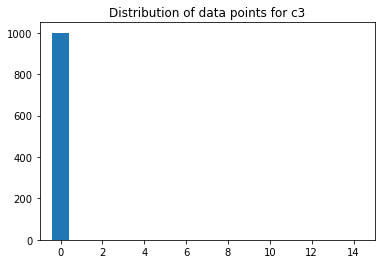

In [17]:
plot_centroid_distributions(initialize_centroids, X, 3, 0, method='maxdist', num_runs=1000)

**Your Answer:**

The results is unique, with the final three centroid indexes always being 0,14,0;   which doesn't meet our expectaction, because we want to get three clusters, we only get two clusters.

**1.2c) Run `plot_centroid_distributions` using the Method K-Means++ using the code below. (2 Points)** The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the the value of num_runs. Explain the results and discuss whether they meet your expectations of the method **K-Means++**! Use the markdown cell below the plots.

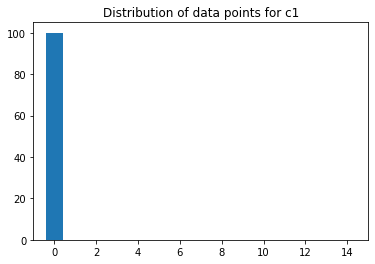

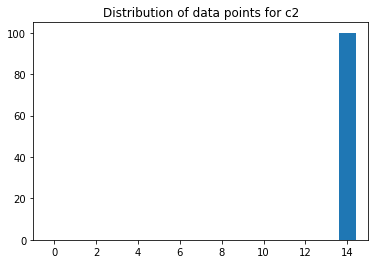

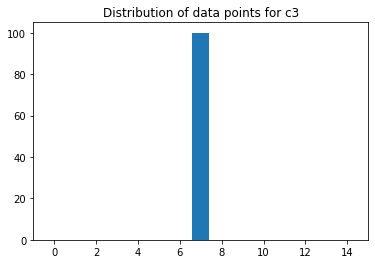

In [18]:
plot_centroid_distributions(initialize_centroids, X, 3, 0, method='kmeans++', num_runs=100)

**Your Answer:**

The result is also unique, with the final centroid indexes being 0,14,7; which meets our expectation well.

### 1.3 Questions about K-Means (6 Points)

**1.3a) Outline all situations where K-Means may return at least 1 empty cluster! (3 Points)** To address this task, please make the following assumptions:
* The number of samples $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrary good or bad

**Your Answer:**

1. K >= N+1;
2. Some initialization of centroids are far away from data points than all other initialized centroids.
3. During the assignment process, all points in a cluster are closer to other centeroids, making this cluster become empty.

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 2). Now let's assume we want to identify outliers in a dataset but only have an implementation for K-Means available.

**1.3b) Describe how we can use K-Means to identify outliers! (3 Points)** Since the notion of outliers is not well defined, its not about have a fool-proof solution but to make a well-informed decision to limited the set of data points that are potential outliers.

**Your Answer:**

After applying K-Means algorithm to the data points, the farthest point from its centroid may regard as potential outliers.
First the data are partitioned in to k groups by assigning them to the closest cluster centers. Once assigned we can compute the distance or dissimilarity between each object and its cluster center, and pick those with largest distances as outliers.

-----------------------------------------------------------------------------

## 2 DBSCAN (20 Points)

We saw in the lecture that DBSCAN has the notion of **noise**, i.e., points that are not part of any cluster. To illustrate this, let's quickly look at a small toy dataset containing 70 data points; all points are 2-dimensional (just to make the visualization easier).

In [19]:
X_dbscan_toy = pd.read_csv('data/a1-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [21]:
dbscan_clustering = cluster.DBSCAN(eps=0.1, min_samples=10).fit(X_dbscan_toy)

The points that are noise are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [22]:
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise in red; all points belonging to **some** cluster are in grey (note that we do not care to which exact cluster these points belong).

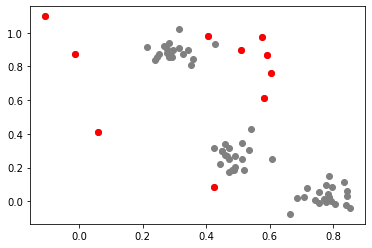

In [23]:
plt.figure()
plt.scatter(X_dbscan_toy[:,0], X_dbscan_toy[:,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red')
plt.show()

### 2.1 Implementing DBSCAN for Noise Detection (14 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in points of a dataset that the DBSCAN considers noise (as illustrated above). This includes that we do not have to care about
* how many clusters there *and*
* which non-noise points belongs to which cluster

**1.2 a) Implement the method `get_noise_dbscan` below to find all noise points according to DBSCAN!** The output should be a list of indices representing the noise points in input dataset X. Some hints:
* Think carefully makes makes a data point a noise point
* Recall that we are not interested in the individual clusters

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results is correct, there will be some minor deduction of points. Note that we already imported the method `euclidean_distances` for you, and you can use anything provided by `numpy`.

In [24]:
def get_noise_dbscan(X, eps=0.0, min_samples=0):
    
    """
    Calculate the initial centroids for performin K-Means

    Inputs:
    - X: A numpy array of shape (N, F) containing N data samples with F features
    - eps: radius definning a point's neighborhood
    - min_samples: minimum number of neighbors in a point's neighborhood to be a core point

    Returns:
    - noise_point_indices: NumPy array containing indices of data points in X representing noise
    """    
    
    noise_point_indices = None
    
    #########################################################################################
    ### Your code starts here ###############################################################
    arr = euclidean_distances(X,X)<=eps
    core_point_indices = None
    core_point_indices = np.where(np.sum(arr!=0, axis=0) >= min_samples)

    arr2 = euclidean_distances(X,X[core_point_indices])<=eps
    border_point_indices = None
    border_point_indices = np.where(np.sum(arr2!=0,axis=1)>=1)

    noise_point_indices = np.setdiff1d(np.arange(0,len(X)), border_point_indices)
    ### Your code ends here #################################################################
    #########################################################################################
    
    return noise_point_indices
    
    
    
my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('The indices of the points labeled as noise are: {}'.format(my_noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


With the code cell below, you can further test your implementation. It uses the popular [IRIS Dataset](https://archive.ics.uci.edu/ml/datasets/iris). It contains 150 data points with 4 numerical features. The code cell extracts the noise points using the DBSCAN implementation of scitkit-learn as well as your own implementation. Of course, the two result should always match for the same values of `eps` and `min_samples`. There is nothing for you to implement here!

In [25]:
X_iris = pd.read_csv('data/a1-iris.csv')[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

eps, min_samples = 0.6, 6

sklearn_clustering_iris = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(X_iris)
sklearn_noise_iris = np.argwhere(sklearn_clustering_iris.labels_ < 0).squeeze()

my_noise_iris = get_noise_dbscan(X_iris, eps=eps, min_samples=min_samples)

print('sklearn solution: {}'.format(sklearn_noise_iris))
print('My own solution:  {}'.format(my_noise_iris))


sklearn solution: [ 41  57  60  93  98 106 109 117 118 122 131]
My own solution:  [ 41  57  60  93  98 106 109 117 118 122 131]


### 2.2 Questions about DBSCAN (6 Points)

Your method `get_noise_dbscan()` finds all the noise points in a dataset according to the definition of DBSCAN. Now let's assume you now want to find all clusters, i.e., the number of clusters and which point belongs to which cluster.

**2.2a) Describe the result of `get_noise_dbscan()` may help you to find all cluster! (2 Points)** There is no need it implement anything; just a brief description how clusters can be found by already knowing all points.

**Your Answer:**

1. choose one core point(let's say core point c) to start the formation the first cluster(let's say cluster A);
2. all points within the neighborhood of core point c become part of the cluster A; If these new points are also core points, the points that are in the neighborhood of them are also added to cluster A.
3. choose another core point that have not been visited in the previous steps. Then apply the same procedures above;
4. process is finished when all points are visited.

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create new dataset `X_new` simply by shuffling `X`; no other changes. Now you run DBSCAN with the same parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same is before.

**2.2b) Describe what this information tells about the dataset and clustering! (2 Points)** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results. 

**Your Answer:**

The density of the dataset is uneven and the cluster spacing varies greatly may cause the result that the clusters are not exactyly the same as before. 
DBSCAN is generally very sensitive to parameters. We should have a good understanding of the data and context to choose proper radius and min points. 
If the radius or the minpts is too large, we may only get one big cluster; If the radius or the minpts is too small, then we may get many small clusters.

Assume you have a $d$-dimensional dataset `X` in the Euclidean space, i.e., each data point as $d$ numerical features (with each feature values in the interval $[0, 1]$). After running DBSCAN over `X`, you get some clustering (again, we only assume it's not only noise). Now you create a new dataset `X_new` by multiplying all data points by 10 afterwards adding 100 to all data points (in Python, assuming X is a NumPy array this can simply be done by `X_new = X * 10 + 100`). Now you can run DBSCAN over `X_new`.

**2.2c) Explain how you have to change the parameters of DBSCAN for `X_new` to get the same clusters as for `X`! (2 Points)**. You can ignore any corner cases related to 2.2a).

**Your Answer:**

Rescale the `radius`: `new_radius = radius*10 + 100`

-----------------------------------------------------------------------------

## 3 Hierarchical Clustering AGNES


### 3.1 Interpreting Dendrograms

We saw in the lecture the dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each datasets contains 30 data points, each with two dimensions.

<img src="data/a1-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using **AGNES with Single Linkage** for the 6 dataset above, but in a random order.

<img src="data/a1-agnes-dendrogram-labeled.png">

**Find the correct combinations of datasets and dendrograms** -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give brief explanation for each decision! Complete the table below! (The last line shows an example.)

| Dataset | Dendrogram | Brief Explanation |
| ---  | ---   | ---                  |
| **A**    | **6** | Two outliers on the left upper corner and right upper corner will be merged into the cluster in the last two steps. |
| **B**    | **1** | Many points are overlaped. When the height is very close to zero, it can also be divided into clusters |
| **C**    | **5** | The point in the middle will be merged to the biggest cluster in the final step. |
| **D**    | **3** | Two big clusters will be merged in the final step, and they are equally distributed. |
| **E**    | **2** | The dataset is randomly distributed and the average distance is relatively large which means that average height should also be large, the dendrogram 2 fits this feature most. |
| **F**    | **4** | Observation reveals that the dataset can be divided into three major clusters. |
| **<font color='red'>X</font>**    | **<font color='red'>9</font>** | <font color='red'>The dataset plot looks like a face and the dendrogram looks like a hat (please come up with better explanations :) !)</font> |

### 3.2 Questions about AGNES

Assume your dataset contains the geolocations of traffic accident on Singapore expressways over the time span of a year. Using AGNES, want to find sections of the expressways where traffic accidents are particularly common.

**3.2a) Which 3 main Linkage Methods covered in the lecture is most suitable for this task? (2 Points)** Briefly explain your choice!


**Your Answer:**

I would like to choose single linkage. From the google map we can see that the shape of the high ways in Singapore is like circles. Single Linkage can handle non-globular shapes very well.

**3.2b) How can the results of AGNES be used to identify outliers in a data. (2 Points)** Briefly explain your answer!

**Your Answer:**

Cut the dendrogram at a relatively high level, and we can the individual points that are finally merged into the cluster. these points can be regarded as outliers because they are far away from other points.